In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_df=pd.read_csv("Movie.csv")
movies_df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  8992 non-null   int64  
 1   movie   8992 non-null   object 
 2   rating  8992 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.9+ KB


                                movie  count
0                    Toy Story (1995)   2569
1                    GoldenEye (1995)   1548
2                         Heat (1995)   1260
3                      Jumanji (1995)   1155
4                      Sabrina (1995)    700
5             Grumpier Old Men (1995)    685
6  Father of the Bride Part II (1995)    657
7                 Sudden Death (1995)    202
8            Waiting to Exhale (1995)    138
9                 Tom and Huck (1995)     78


<Axes: xlabel='Movies', ylabel='Counts'>

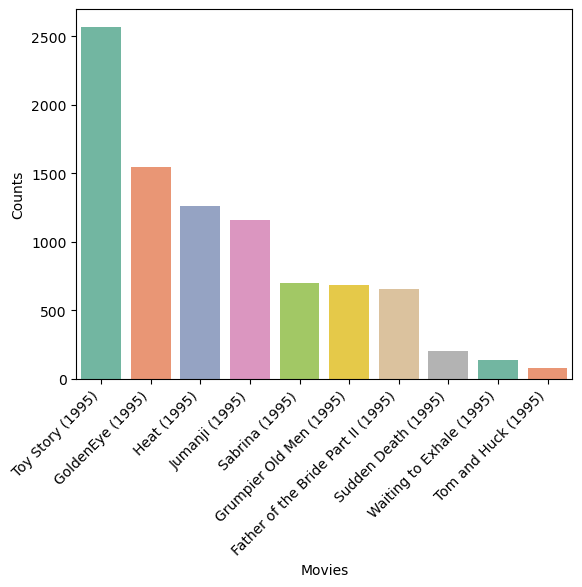

In [4]:
counts=movies_df["movie"].value_counts().reset_index()
print(counts)
columns=["movie","counts"]
plt.xlabel("Movies")
plt.ylabel("Counts")
plt.xticks(rotation=45,ha="right")
sns.barplot(data=counts,x="movie",y="count",hue="movie",palette="Set2")

In [5]:
print(movies_df.userId.unique())
len(movies_df.userId.unique())

[   3    6    8 ... 7080 7087 7105]


4081

In [6]:
movies_df.sort_values("userId")

,userId,movie,rating
2569,1,Jumanji (1995),3.5
3724,2,Grumpier Old Men (1995),4.0
0,3,Toy Story (1995),4.0
5204,4,Heat (1995),3.0
7444,4,GoldenEye (1995),4.0
...,...,...,...
6463,7117,Heat (1995),5.0
2567,7119,Toy Story (1995),5.0
2568,7120,Toy Story (1995),4.5
3723,7120,Jumanji (1995),4.0


   rating  count
0     3.0   2736
1     4.0   2660
2     5.0   1394
3     3.5    679
4     2.0    542
5     4.5    374
6     2.5    277
7     1.0    212
8     1.5     61
9     0.5     57


<Axes: xlabel='Rating', ylabel='Counts'>

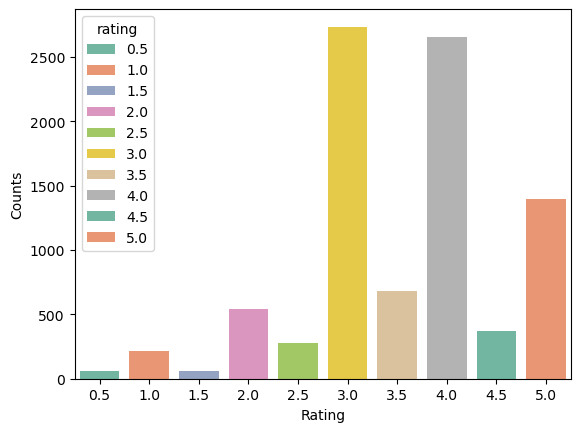

In [7]:
counts=movies_df["rating"].value_counts().reset_index()
print(counts)
columns=["rating","count"]
plt.xlabel("Rating")
plt.ylabel("Counts")
sns.barplot(data=counts,x="rating",hue="rating",y="count",palette="Set2")

### Transform the table

In [18]:
user_movies_df=movies_df.pivot_table(index="userId",columns="movie",values="rating")
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [20]:
user_movies_df.fillna(0,inplace=True)

In [22]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [24]:
from sklearn.metrics import pairwise_distances

In [26]:
user_sim=1-pairwise_distances(user_movies_df.values,metric="cosine")

In [28]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [30]:
user_sim.shape

(4081, 4081)

In [32]:
np.fill_diagonal(user_sim,0)
user_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 0.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 0.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 0.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        0.        ]])